**Importing the datasets**

In [24]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score,precision_score,recall_score
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers,Model


In [11]:
minst = tf.keras.datasets.mnist
(X_train, _),(X_test, _)= minst.load_data()
X_train,X_val = X_train[:-10000],X_train[-10000]

X_train = X_train.astype('float32') /255.
X_test = X_test.astype('float32') /255.
X_val = X_val.astype('float32') /255.

print(X_train.shape)
print(X_test.shape)
print(X_val.shape)


(50000, 28, 28)
(10000, 28, 28)
(28, 28)


Visulaising the dataset images

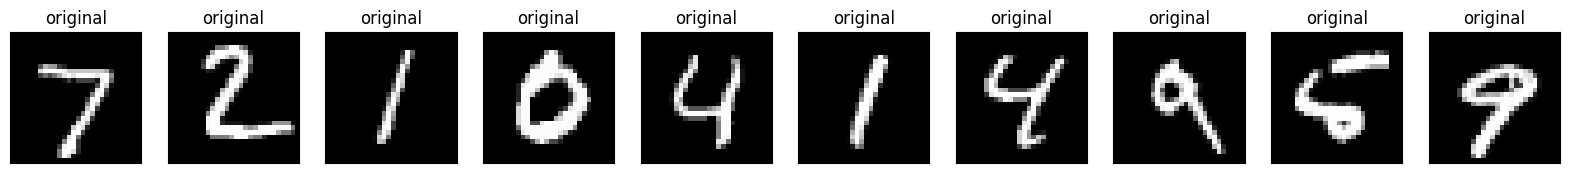

In [12]:
n=10
plt.figure(figsize=(20,4))
for i in range(n):
  #Display Original
  ax = plt.subplot(2,n,i+1)
  plt.imshow(X_test[i])
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

In [13]:
latent_dim =64

class Autoencoder(Model):
  def __init__(self,latent_dim):
    super(Autoencoder,self).__init__()
    self.latent_dim = latent_dim
    self.encoder = tf.keras.Sequential([
        layers.Flatten(),
        layers.Dense(latent_dim, activation ='relu')
    ])
    self.decoder = tf.keras.Sequential([
        layers.Dense(784,activation='sigmoid'),
        layers.Reshape((28,28))
         ])
  def call(self,X):
      encoded = self.encoder(X)
      decoder =self.decoder(encoded)
      return decoder

autoencoder = Autoencoder(latent_dim)

Define Auto Enocder Class

In [14]:
autoencoder.compile(optimizer = 'adam', loss = 'MeanAbsoluteError')

In [15]:
autoencoder.fit(X_train,X_train,
                epochs= 25 ,
                shuffle =True,
                validation_data = (X_test,X_test))





Epoch 1/25
1563/1563 [==============================] - 9s 5ms/step - loss: 0.0960 - val_loss: 0.0750
Epoch 2/25
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0689 - val_loss: 0.0651
Epoch 3/25
1563/1563 [==============================] - 9s 6ms/step - loss: 0.0639 - val_loss: 0.0630
Epoch 4/25
1563/1563 [==============================] - 7s 4ms/step - loss: 0.0627 - val_loss: 0.0622
Epoch 5/25
1563/1563 [==============================] - 8s 5ms/step - loss: 0.0616 - val_loss: 0.0610
Epoch 6/25
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0609 - val_loss: 0.0607
Epoch 7/25
1563/1563 [==============================] - 8s 5ms/step - loss: 0.0606 - val_loss: 0.0606
Epoch 8/25
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0605 - val_loss: 0.0605
Epoch 9/25
1563/1563 [==============================] - 8s 5ms/step - loss: 0.0603 - val_loss: 0.0597
Epoch 10/25
1563/1563 [==============================] - 6s 4ms/step - loss: 0.059

In [20]:
encoder = autoencoder.encoder
#decoded_img = autoencoder.decoder(encoded_img).numpy()

In [21]:
# Load the MNIST dataset with labels for classification
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

num_classes = 10

# Define the classification model using the pre-trained encoder
classification_model = tf.keras.Sequential([
    encoder,  # Transfer learning: using the pre-trained encoder
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

classification_model.compile(optimizer='adam',
                             loss='sparse_categorical_crossentropy',
                             metrics=['accuracy'])

# Train the classification model
classification_model.fit(X_train, y_train,
                         epochs=10,
                         validation_data=(X_test, y_test))


Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3731 - accuracy: 0.8893 - val_loss: 0.1839 - val_accuracy: 0.9426
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1590 - accuracy: 0.9520 - val_loss: 0.1294 - val_accuracy: 0.9599
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1108 - accuracy: 0.9658 - val_loss: 0.1081 - val_accuracy: 0.9669
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0848 - accuracy: 0.9734 - val_loss: 0.0986 - val_accuracy: 0.9699
Epoch 5/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0700 - accuracy: 0.9783 - val_loss: 0.0873 - val_accuracy: 0.9723
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0557 - accuracy: 0.9816 - val_loss: 0.0960 - val_accuracy: 0.9709
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0476 - accuracy: 0.9846 - val_loss: 0.0946 - val_accuracy

In [22]:
test_loss, test_acc = classification_model.evaluate(X_test, y_test, verbose=2)
print(f'Test accuracy: {test_acc}')


313/313 - 1s - loss: 0.0985 - accuracy: 0.9725 - 924ms/epoch - 3ms/step
Test accuracy: 0.9725000262260437


In [25]:
predictions = classification_model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)


313/313 [==============================] - 1s 2ms/step


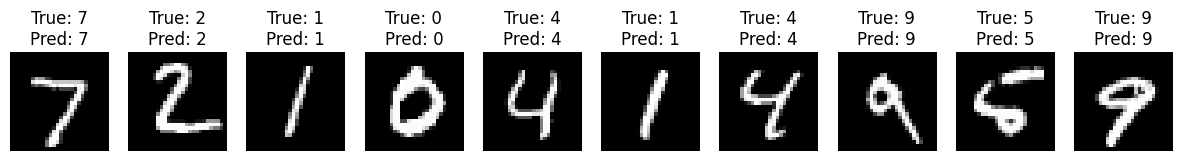

In [26]:
import matplotlib.pyplot as plt

# Function to plot the images
def plot_images(images, true_labels, predicted_labels, num_images=10):
    plt.figure(figsize=(15, 3))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title(f"True: {true_labels[i]}\nPred: {predicted_labels[i]}")
        plt.axis('off')
    plt.show()

# Plot the first 10 test images
plot_images(X_test, y_test, predicted_labels, num_images=10)
